#### 시계열 분석을 위한 기본학습

##### 기본용어

- 추세(Trend) : 시간에 따라 감소/증가하는 성향
- 계절성(Seasonality) : 계절에 따라 패턴을 가지는 성향
- 순환성(Cyclical) : 특정상황에서 발생하는 임시적인 성향(추세)
- 불규칙성(Irregular) : 지진,홍수,파업,코로나 같은 특수한 요인으로 발생하는 불규칙 패턴

##### 시계열 데이터 전처리방법

In [1]:
import pandas as pd
import numpy as np

In [2]:
# datetime 변환
df = pd.DataFrame({'date': ['2019-01-03', '2021-11-24', '2023-07-11'], 'name':['JH', 'YS', 'OB']})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [3]:
# date 컬럼 datetime 형변환
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes


In [4]:
df.astype({'date':'datetime64[ns]'})

,date,name
0,2019-01-03,JH
1,2021-11-24,YS
2,2023-07-11,OB


In [5]:
# 날짜를 인덱스로 변경
df.set_index(keys=['date'], inplace=True)
df

,name
date,
2019-01-03,JH
2021-11-24,YS
2023-07-11,OB


In [6]:
# 날짜를 인덱스에서 해제(인덱스 초기화)
df.reset_index(inplace=True)
df

,date,name
0,2019-01-03,JH
1,2021-11-24,YS
2,2023-07-11,OB


In [7]:
# 결측치 확인 
# 결측치값 python None, numpy nan
df = pd.DataFrame({'date': ['2019-01-03', '2021-11-24', '2022-01-15', '2023-07-11'], 'x1':[0.1, 2.0, np.nan, 1.2]})
df

,date,x1
0,2019-01-03,0.1
1,2021-11-24,2.0
2,2022-01-15,NaN
3,2023-07-11,1.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4 non-null      object 
 1   x1      3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


In [9]:
df = df.astype({'date':'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4 non-null      datetime64[ns]
 1   x1      3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 196.0 bytes


In [10]:
# 날짜를 인덱스
df.set_index(keys=['date'], inplace=True)
df

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,NaN
2023-07-11,1.2


In [11]:
# 결측치 확인
df.isnull().sum()

x1    1
dtype: int64

In [12]:
# 결측치 제거, inplace=True 변경 결정 ffill 이전값으로 대체
df.fillna(method='ffill')

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,2.0
2023-07-11,1.2


In [13]:
# bfill 밑의 값으로 대체
df.fillna(method='bfill')

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,1.2
2023-07-11,1.2


In [14]:
# 결측치 전후의 값의 평균으로 채우기
df.interpolate()

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2022-01-15,1.6
2023-07-11,1.2


In [15]:
# 결측지 제거 -> 데이터수 변경
df.dropna()

,x1
date,
2019-01-03,0.1
2021-11-24,2.0
2023-07-11,1.2


In [16]:
# 빈도 설정
df.index

DatetimeIndex(['2019-01-03', '2021-11-24', '2022-01-15', '2023-07-11'], dtype='datetime64[ns]', name='date', freq=None)

In [17]:
# 'Y 매년 마지막날, 'M', 'D', 'W', 'SM', 'CBM', 'MS', 'Q', 'QS', 'H', 'T', 'S', 'N'
df.asfreq(freq='D', method='bfill')

,x1
date,
2019-01-03,0.1
2019-01-04,2.0
2019-01-05,2.0
2019-01-06,2.0
2019-01-07,2.0
...,...
2023-07-07,1.2
2023-07-08,1.2
2023-07-09,1.2


In [18]:
# rolling - 빈도범위를 다시 묶을때 특정값이 사라지는 경우 방지
df = pd.DataFrame({'date': ['2019-01-03', '2020-09-04', '2021-11-24', '2022-01-15', '2023-07-11'], 'x1':[5,4,3,2,7]})
df = df.astype({'date':'datetime64[ns]'})
df.set_index(keys=['date'], inplace=True)
df

,x1
date,
2019-01-03,5
2020-09-04,4
2021-11-24,3
2022-01-15,2
2023-07-11,7


In [19]:
# rolling(1) 현재자기값을 그대로 평균
df.rolling(1).mean()

,x1
date,
2019-01-03,5.0
2020-09-04,4.0
2021-11-24,3.0
2022-01-15,2.0
2023-07-11,7.0


In [20]:
# rolling(2) 현재값을 밑으로 밀면서 자기값과 합쳐서 평균
df.rolling(2).mean()

,x1
date,
2019-01-03,NaN
2020-09-04,4.5
2021-11-24,3.5
2022-01-15,2.5
2023-07-11,4.5


In [21]:
# 이전값과 차이 계산 diff
y_diff = df.diff()
y_diff.columns = ['diff']

In [22]:
pd.concat([df, y_diff], axis=1)

,x1,diff
date,,
2019-01-03,5,NaN
2020-09-04,4,-1.0
2021-11-24,3,-1.0
2022-01-15,2,-1.0
2023-07-11,7,5.0


In [23]:
# 데이터 밀기
df.shift(-1)

,x1
date,
2019-01-03,4.0
2020-09-04,3.0
2021-11-24,2.0
2022-01-15,7.0
2023-07-11,NaN


In [24]:
# 원-핫 인코딩 one-hot encoding
df_raw = pd.DataFrame({'color':['red','blue','green','blue','red']})

one_hot = pd.get_dummies(df_raw['color'])

In [25]:
one_hot

,blue,green,red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


In [26]:
# True/False 대신 1/0 표시
df_raw.pop('color').str.get_dummies()

,blue,green,red
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


##### Apple 주식 데이터 전처리

##### 주식관련 라이브러리 설치
- FinanceDataReader 모듈 설치

```python
!pip install finance-DataReader
```

In [27]:
!pip install finance-DataReader

                                              0.0/3.8 MB ? eta -:--:--
                                              0.1/3.8 MB 1.1 MB/s eta 0:00:04
     --                                       0.2/3.8 MB 2.4 MB/s eta 0:00:02
     ------                                   0.6/3.8 MB 4.4 MB/s eta 0:00:01
     -----------                              1.0/3.8 MB 6.0 MB/s eta 0:00:01
     ------------------                       1.8/3.8 MB 7.5 MB/s eta 0:00:01
     ----------------------------             2.7/3.8 MB 9.5 MB/s eta 0:00:01
     ---------------------------------------  3.8/3.8 MB 12.0 MB/s eta 0:00:01
     ---------------------------------------- 3.8/3.8 MB 10.9 MB/s eta 0:00:00


In [28]:
import FinanceDataReader as fdr  # 주식라이브러리 추가

import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [29]:
# 2022년 애플주식 데이터로드
# 미국주식은 주식코드, 우리나라 코드번호
df = fdr.DataReader('AAPL', '2022')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144302,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405670,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510971,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100
...,...,...,...,...,...,...
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000


In [30]:
# KRX : 한국주식거래 전체 종목, KOSPI : 코스피 종목, KOSDAQ : 코스닥 종목, KONEX : 중소기업용 
# NASDAQ : 나스닥, NYSE : 뉴욕증권거래소, AMEX : 미국주식 섹터정보, SP500 : S&P 종목
# HKEX : 홍콩주식
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,060310,KR7060310000,3S,KOSDAQ,중견기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48536642,KSQ
1,095570,KR7095570008,AJ네트웍스,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46822295,STK
2,006840,KR7006840003,AK홀딩스,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13247561,STK
3,054620,KR7054620000,APS,KOSDAQ,중견기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20394221,KSQ
4,265520,KR7265520007,AP시스템,KOSDAQ,우량기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15281421,KSQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,000547,KR7000542001,흥국화재2우B,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153600,STK
2730,000545,KR7000541003,흥국화재우,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,768000,STK
2731,003280,KR7003280005,흥아해운,KOSPI,,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240424899,STK
2732,037440,KR7037440005,희림,KOSDAQ,우량기업부,-,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13922475,KSQ


In [31]:
df_nasdaq = fdr.StockListing('NASDAQ')
df_nasdaq

100%|██████████| 4238/4238 [00:09<00:00, 468.28it/s] 


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,전화 및 소형 장치,57106020
1,MSFT,Microsoft Corp,소프트웨어,57201020
2,AMZN,Amazon.com Inc,백화점,53402010
3,NVDA,NVIDIA Corp,반도체,57101010
4,TSLA,Tesla Inc,자동차 및 트럭 제조,53101010
...,...,...,...,...
4233,TBMCR,Trailblazer Merger Rights Exp 21 April 2028,투자 지주 회사,55601010
4234,OAKUR,Oak Woods Acquisition Rights Exp 3 March 2028,투자 지주 회사,55601010
4235,SXTP,60 Degrees Pharmaceuticals Inc,제약,56201040
4236,GODNR,Golden Star Acquisition Rights Exp 1 May 2028,투자 지주 회사,55601010


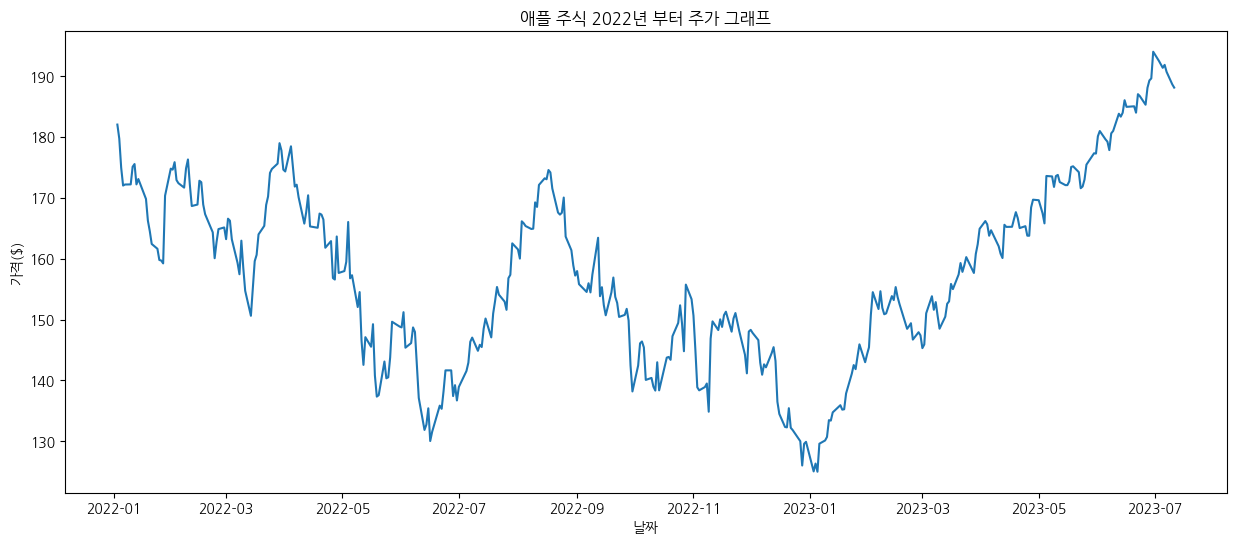

In [32]:
# 애플 주식 시각화
plt.figure(figsize=(15, 6))
plt.title('애플 주식 2022년 부터 주가 그래프')
plt.xlabel('날짜')
plt.ylabel('가격($)')

sns.lineplot(x=df.index, y=df['Close'])
plt.show()

In [33]:
# 삼성전자
df_samsung = fdr.DataReader('005930', '2019')
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2023-07-06,71900,72400,71500,71600,14777667,-0.005556
2023-07-07,71100,71400,69800,69900,17308877,-0.023743
2023-07-10,70000,70400,69200,69500,11713926,-0.005722


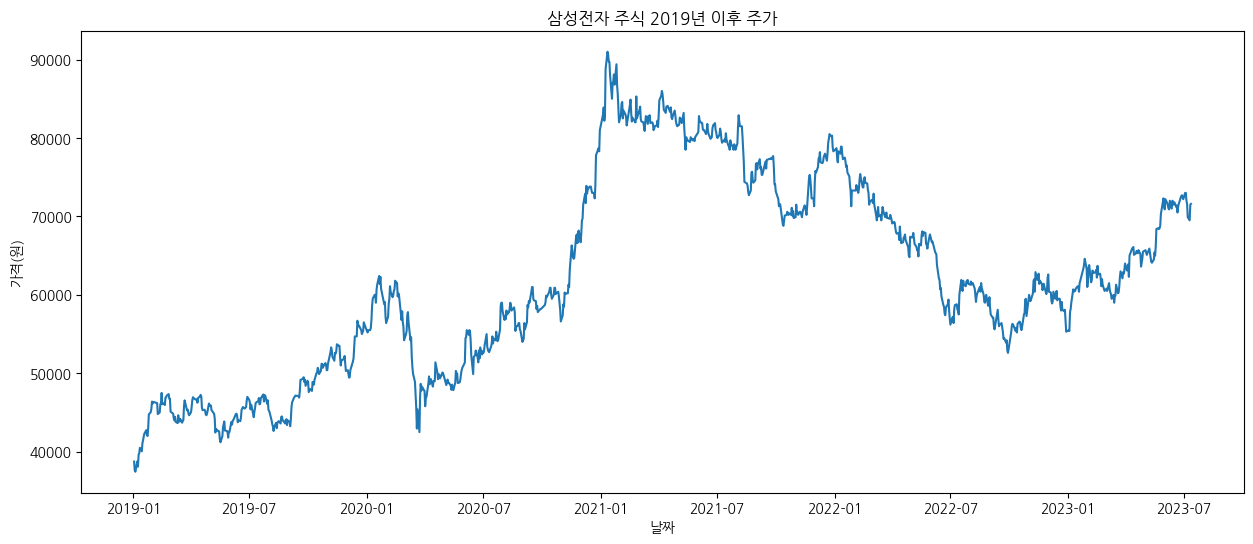

In [34]:
# 삼성전자 주식 시각화
plt.figure(figsize=(15, 6))
plt.title('삼성전자 주식 2019년 이후 주가')
plt.xlabel('날짜')
plt.ylabel('가격(원)')

sns.lineplot(x=df_samsung.index, y=df_samsung['Close'])
plt.show()